# Esercitazione 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Importance sampling

In questo esercizio si vuole usare una tecnica Monte Carlo per stimare il valore di un integrale. Si tratta del metodo dell'_importance sampling_. Se l'integrale che si vuole calcolare ha la forma seguente:

$$ I = \int_\Omega g(x)p(x)dx, $$

dove $p$ è una densità di probabilità su $\Omega$, introduciamo una seconda distribuzione di probabilità $d(x)$ tale che

$$ I = \int_\Omega \frac{g(x)p(x)}{d(x)}d(x)dx. $$

Se conoscessimo la soluzione al problema, posto $d(x) = g(x)p(x)/I$, la quantità

$$ G_N = \frac{1}{N}\sum_{i = 0}^{N} \frac{g(x)p(x)}{d(x)} = I,$$

sarebbe proprio l'integrale di nostro interesse. Se $d$ non è l'integranda, in ogni caso $G_N$ è uno stimatore dell'integrale. Se $d$ è la distribuzione uniforme, allora il metodo di _importance sampling_ si riduce al metodo della media; se invece $d$ è simile all'integranda, ci aspettiamo che la varianza sia minore e quindi che $G_N$ approsimi meglio, a parità di $N$, rispetto al metodo della media.

Nel nostro caso la funzione da integrare è $f(x) = \pi/2 \cos(\pi x/2)$

Stima dell'intagrale - metodo della media: 0.997344 +- 0.00225918
Stima dell'intagrale - importance sampling: 1.00077 +- 0.00061404
Valore atteso (esatto): 1


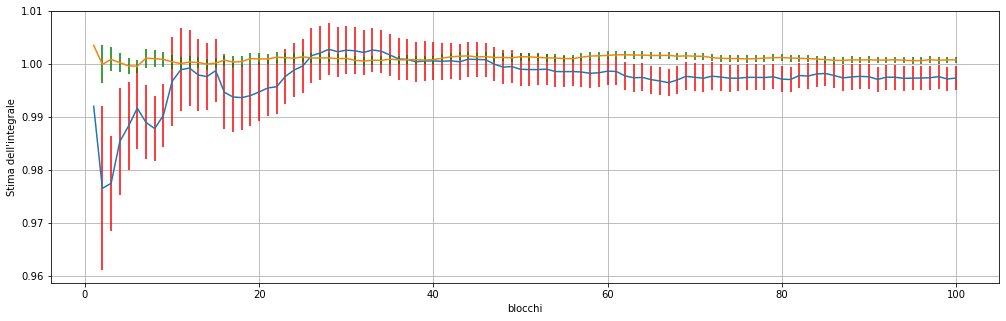

In [5]:
iblk, I, error = np.loadtxt("Integral.dat", usecols=(0,1,2), delimiter=',', unpack='true')
iblk, IIMP, errorIMP = np.loadtxt("Integral_IMP.dat", usecols=(0,1,2), delimiter=',', unpack='true')

plt.figure(figsize = (17,5))
plt.errorbar(iblk,I,yerr=error, ecolor='red')
plt.errorbar(iblk,IIMP,yerr=errorIMP, ecolor='green')
plt.xlabel("blocchi")
plt.ylabel("Stima dell'integrale")
plt.grid()

print("Stima dell'intagrale - metodo della media: " + str(I[-1]) + " +- " + str(error[-1]) )
print("Stima dell'intagrale - importance sampling: " + str(IIMP[-1]) + " +- " + str(errorIMP[-1]) )
print("Valore atteso (esatto): 1")

Si vede chiaramente che con l'_importance sampling_ la stima converge molto più rapidamente, e con varianza minore, al valore atteso.

## Random Walk

Ora intendiamo studiare alcune proprietà dei random walk. Iniziamo con quello discreto, che si muove attraverso un reticolo 3-dimensionale. Ad ogni passo può muoversi lungo una delle tre dimensioni spaziali in un verso casuale, con la stessa probabilità.

Vengono eseguiti $M = 50000$ random walk, ciascuno da $P = 100$ passi, divisi in $N = 100$ blocchi. Per ogni blocco viene calcolata, come funzione del passo, la media delle distanze raggiunte da ogni random walk: $\sqrt{<|r_k(i)|^2>_j}$, con $k = 0,1,\dots, M/N$, $j = 0,1\dots, N$ e $i = 0,1,\dots, P$. Ottenute $N$ stime della distanza, ne calcoliamo la media, che rappresentiamo qui sotto come funzione dello step $i$;

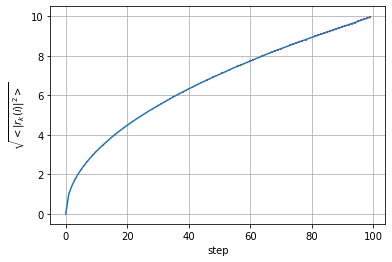

In [6]:
x, f, error = np.loadtxt("ES2_rndw.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,f,yerr=error, ecolor='red')
plt.xlabel('step')
plt.ylabel('$\sqrt{<|r_k(i)|^2>}$')
plt.grid()
plt.show()

Si osserva chiaramente che il random walk tende a _diffondersi_ nello spazio, nel senso che la distanza media dall'orgine aumenta col passare del tempo.

Studiamo ora il caso di un random walk che si sviluppa nel continuo: ad ogni passo può spostarsi in punto casuale su una superficie sferica di raggio unitario, centrata sulla posizione attuale. Il numero di passi e di blocchi è lo stesso del caso precedente.

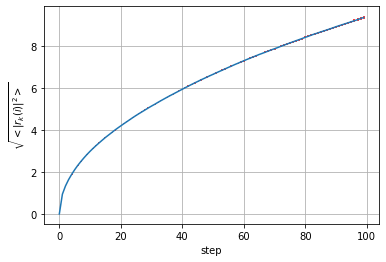

In [7]:
x, f, error = np.loadtxt("ES2_rndwc.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,f,yerr=error, ecolor='red')
plt.xlabel('step')
plt.ylabel('$\sqrt{<|r_k(i)|^2>}$')
plt.grid()
plt.show()

Di nuovo viene confermato il comportamento diffusivo del random walk.

### Grafico

Scelto un blocco casuale, mostriamo qui $500$ random walk provenienti dal caso continuo.

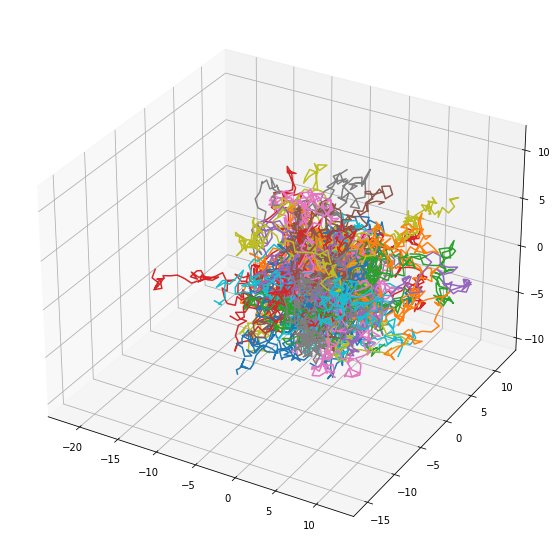

In [8]:
from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure(figsize = (10,10))
ax = plt.axes( projection='3d')



for i in range(100):
    x, y, z = np.loadtxt("./rndws/rndw_" + str(i) + ".xyz", usecols=(0,1,2), delimiter=',', unpack = True)
    ax.plot3D(x, y, z);